## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 
%matplotlib inline

In [2]:
# Creat my project director as path
path = r"C:\Users\Poory\OneDrive\Desktop\project\Cancer Prediction"

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged.csv'))

In [4]:
pd.set_option('display.max_columns' , 100)
df.head()

State  Year   State_Year Gender Leading_Cancer_Sites  Incidence_Counts  \
0  Alabama  2010  Alabama2010   Male             Prostate              3872   
1  Alabama  2011  Alabama2011   Male             Prostate              3817   
2  Alabama  2012  Alabama2012   Male             Prostate              3412   
3  Alabama  2013  Alabama2013   Male             Prostate              3318   
4  Alabama  2014  Alabama2014   Male             Prostate              3103   

   Incidence_Age_Adjusted_Rate  Death_Counts  Mortality_Age_Adjusted_Rate  \
0                       151.08           544                        27.67   
1                       146.45           544                        26.61   
2                       127.56           461                        22.07   
3                       120.95           470                        22.13   
4                       109.17           467                        21.30   

   Mortality_Incidence_Age_Adjusted_Rate_Ratio  Population  \
0                                        0.183     2323013   
1                                        0.182     2328518   
2                                        0.173     2336196   
3                                        0.183     2343135   
4                                        0.195     2348012   

   %_Fair_or_Poor_Health  Average_Number_of_Physically_Unhealthy_Days  \
0                  22.66                                         4.63   
1                  22.66                                         4.65   
2                  22.53                                         4.52   
3                  23.28                                         4.66   
4                  23.28                                         4.66   

   Average_Number_of_Mentally_Unhealthy_Days  %_Low_birthweight  \
0                                       4.26              10.23   
1                                       4.29              10.35   
2                                       4.22              10.55   
3                                       4.44              10.55   
4                                       4.44              10.58   

   %_Adult_smoking  %_Adults_with_Obesity  %_Physically_Inactive  \
0            23.37                  33.62                  32.80   
1            22.76                  35.13                  33.18   
2            22.09                  35.09                  33.14   
3            22.43                  35.08                  33.55   
4            22.43                  35.29                  31.79   

   %_Excessive_Drinking  %_Uninsured  Primary_Care_Physicians_Rate  \
0                 10.45        17.64                         49.16   
1                 10.54        17.14                         49.16   
2                 10.95        17.55                         42.61   
3                 11.68        17.42                         42.93   
4                 11.68        16.49                         42.86   

   Mental_Health_Provider_Rate  %_With_Annual_Mammogram  %_Unemployed  \
0                        19.80                    60.94         12.07   
1                         7.16                    62.95         11.20   
2                        10.91                    62.74         10.46   
3                        35.21                    60.53          8.57   
4                        43.65                    60.65          7.67   

   %_Children_in_Poverty  Average_Daily_PM2.5  %_Severe_Housing_Problems  \
0                  26.43                 3.27                      28.40   
1                  31.99                 3.27                      27.41   
2                  31.75                12.87                      28.32   
3                  32.15                12.79                      14.47   
4                  32.55                12.79                      15.13   

   %_Adults_with_Diabetes  Median_Household_Income  \
0                   13.06                    37179   
1                 

In [5]:
# Make a new data frame of related columns without categorical data:

ndf = df[['Mortality_Age_Adjusted_Rate','%_Fair_or_Poor_Health','%_Adult_smoking','%_Adults_with_Obesity','%_Physically_Inactive','%_Uninsured',
                   'Primary_Care_Physicians_Rate','Mental_Health_Provider_Rate','%_Unemployed','%_Children_in_Poverty',
                   '%_Adults_with_Diabetes','Median_Household_Income']]
ndf.head()

Mortality_Age_Adjusted_Rate  %_Fair_or_Poor_Health  %_Adult_smoking  \
0                        27.67                  22.66            23.37   
1                        26.61                  22.66            22.76   
2                        22.07                  22.53            22.09   
3                        22.13                  23.28            22.43   
4                        21.30                  23.28            22.43   

   %_Adults_with_Obesity  %_Physically_Inactive  %_Uninsured  \
0                  33.62                  32.80        17.64   
1                  35.13                  33.18        17.14   
2                  35.09                  33.14        17.55   
3                  35.08                  33.55        17.42   
4                  35.29                  31.79        16.49   

   Primary_Care_Physicians_Rate  Mental_Health_Provider_Rate  %_Unemployed  \
0                         49.16                        19.80         12.07   
1                         49.16                         7.16         11.20   
2                         42.61                        10.91         10.46   
3                         42.93                        35.21          8.57   
4                         42.86                        43.65          7.67   

   %_Children_in_Poverty  %_Adults_with_Diabetes  Median_Household_Income  
0                  26.43                   13.06                    37179  
1                  31.99                   13.90                    36340  
2                  31.75                   13.88                    36508  
3                  32.15                   14.08                    37055  
4                  32.55                   14.48                    38019

### 2. The elbow technique

In [6]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.

kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(ndf).score(ndf) for i in range(len(kmeans))] 

score

C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-759207062630.9474,
 -252083926071.0403,
 -117794601848.87505,
 -68561726986.51407,
 -45706374391.92127,
 -33850315173.705666,
 -24267419864.98631,
 -18719473375.04134,
 -14728518882.220093]

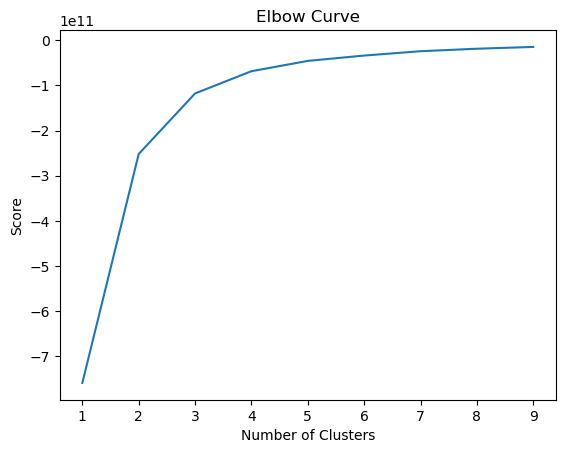

In [7]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there is a significant transition from two to three on the x-axis. However, after that point, the curve levels out. This suggests that the optimal number of clusters for our data is three. It's worth noting that our data frame contains statistics for five different types of cancer. It's interesting that the elbow plot indicates that 3 clusters would be a better choice in this case.

### 3. k-means clustering

In [8]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [9]:
# Fit the k-means object to the data.

kmeans.fit(ndf)

C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [10]:
ndf['clusters'] = kmeans.fit_predict(ndf)

C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Poory\AppData\Local\Temp\ipykernel_21044\2703937659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf['clusters'] = kmeans.fit_predict(ndf)


In [11]:
ndf.head()

Mortality_Age_Adjusted_Rate  %_Fair_or_Poor_Health  %_Adult_smoking  \
0                        27.67                  22.66            23.37   
1                        26.61                  22.66            22.76   
2                        22.07                  22.53            22.09   
3                        22.13                  23.28            22.43   
4                        21.30                  23.28            22.43   

   %_Adults_with_Obesity  %_Physically_Inactive  %_Uninsured  \
0                  33.62                  32.80        17.64   
1                  35.13                  33.18        17.14   
2                  35.09                  33.14        17.55   
3                  35.08                  33.55        17.42   
4                  35.29                  31.79        16.49   

   Primary_Care_Physicians_Rate  Mental_Health_Provider_Rate  %_Unemployed  \
0                         49.16                        19.80         12.07   
1                         49.16                         7.16         11.20   
2                         42.61                        10.91         10.46   
3                         42.93                        35.21          8.57   
4                         42.86                        43.65          7.67   

   %_Children_in_Poverty  %_Adults_with_Diabetes  Median_Household_Income  \
0                  26.43                   13.06                    37179   
1                  31.99                   13.90                    36340   
2                  31.75                   13.88                    36508   
3                  32.15                   14.08                    37055   
4                  32.55                   14.48                    38019   

   clusters  
0         0  
1         0  
2         0  
3         0  
4         0

In [12]:
ndf['clusters'].value_counts()

clusters
2    2552
0    2530
1    1089
Name: count, dtype: int64

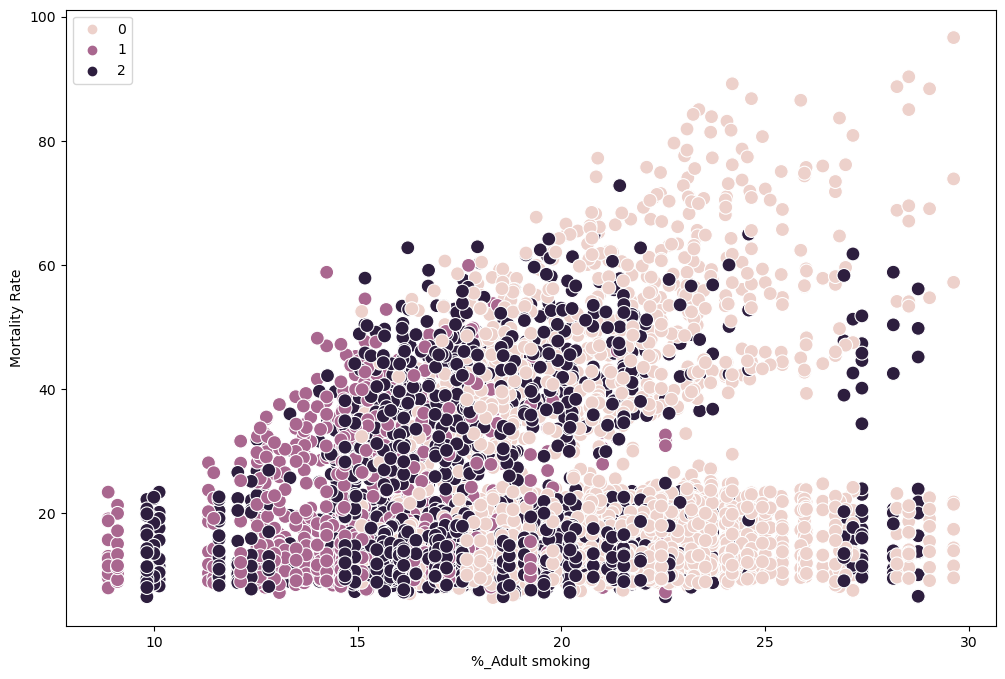

In [13]:
# Plot the clusters for the "Mortality_Age_Adjusted_Rate" and "%_Adult_smoking" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ndf['%_Adult_smoking'], y=ndf['Mortality_Age_Adjusted_Rate'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('%_Adult smoking') # Label x-axis.
plt.ylabel('Mortality Rate') # Label y-axis.
plt.show()

### The scatter plot shows that data points from different clusters are mixed and distributed pretty randomly. This suggests that there is no clear separation or distinct grouping based on the two variables (%_Adult_smoking and Mortality_Age_Adjusted_Rate) we visualized.

### This can happen if these two variables alone are not sufficient to differentiate the clusters formed by the KMeans algorithm.

### Also, this scatter plot emphasizes that smoking is associated with certain cancer mortalities but may not be a factor for all types of cancer.

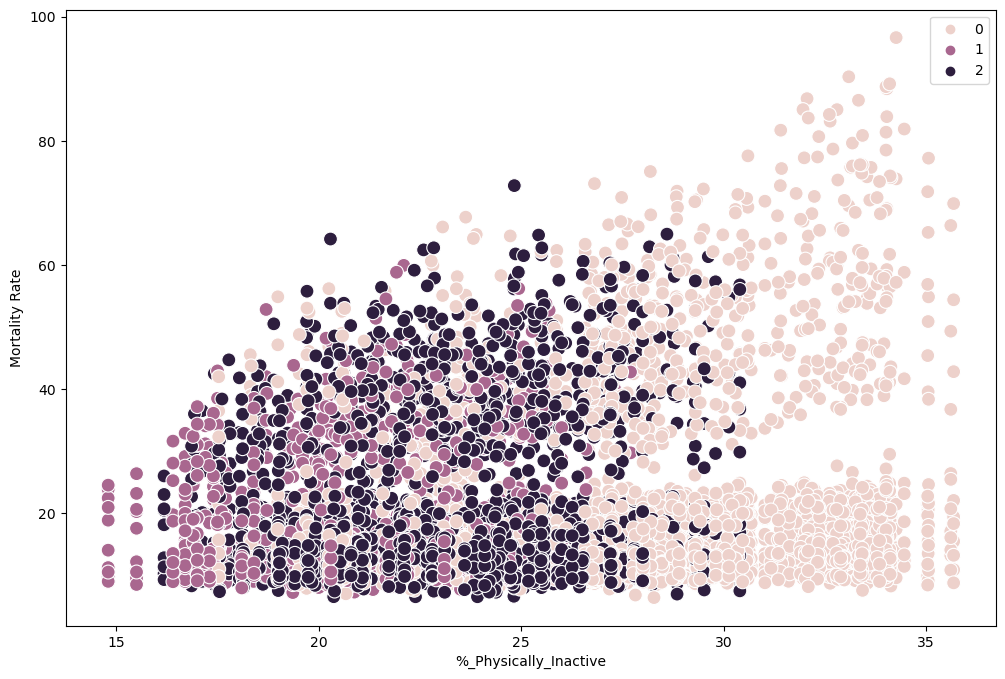

In [14]:
# Plot the clusters for the "Mortality_Age_Adjusted_Rate" and "%_Physically_Inactive" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ndf['%_Physically_Inactive'], y=ndf['Mortality_Age_Adjusted_Rate'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('%_Physically_Inactive') 
plt.ylabel('Mortality Rate') 
plt.show()

### "When we compare the percentage of people who are physically inactive with the cancer mortality rate, it's clear that there is a positive correlation between the two variables. Additionally, the k-means models were able to almost separate the data points into three distinct groups."

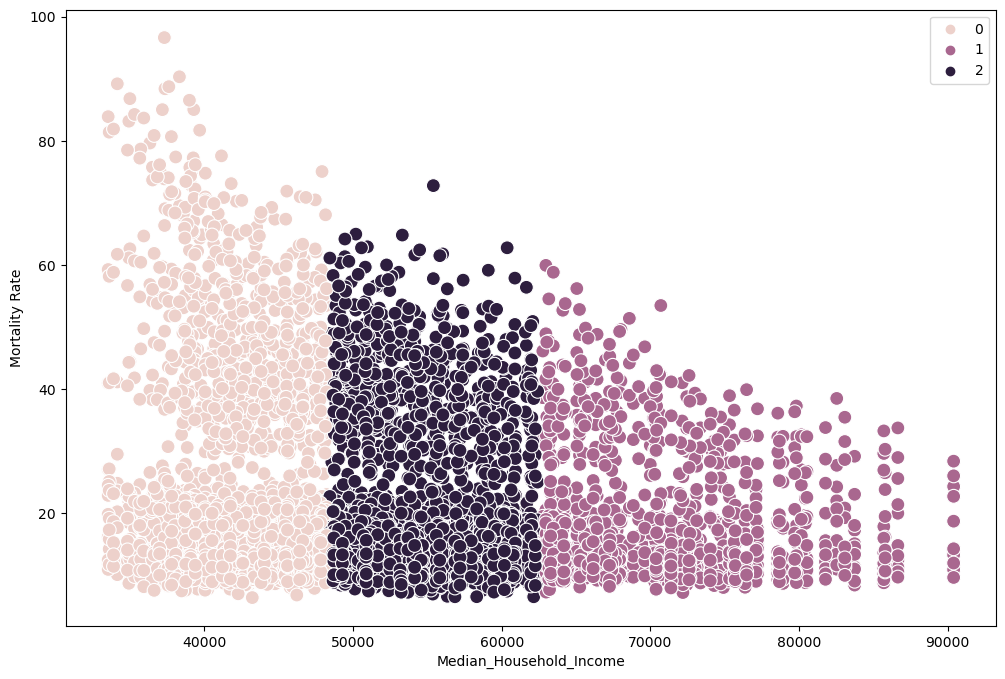

In [15]:
# Plot the clusters for the "Mortality_Age_Adjusted_Rate" and "Median_Household_Income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ndf['Median_Household_Income'], y=ndf['Mortality_Age_Adjusted_Rate'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Median_Household_Income') 
plt.ylabel('Mortality Rate') 
plt.show()

### "From our analysis, it's evident that the KMeans model effectively separated our clusters, indicating that it was a suitable choice for grouping our data. We observed a correlation between higher household income and lower cancer mortality rates.

### It's important to note that these variables have different scales and ranges, and our data was not standardized. As a next step, I plan to standardize these variables in order to mitigate potential biases." 

C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


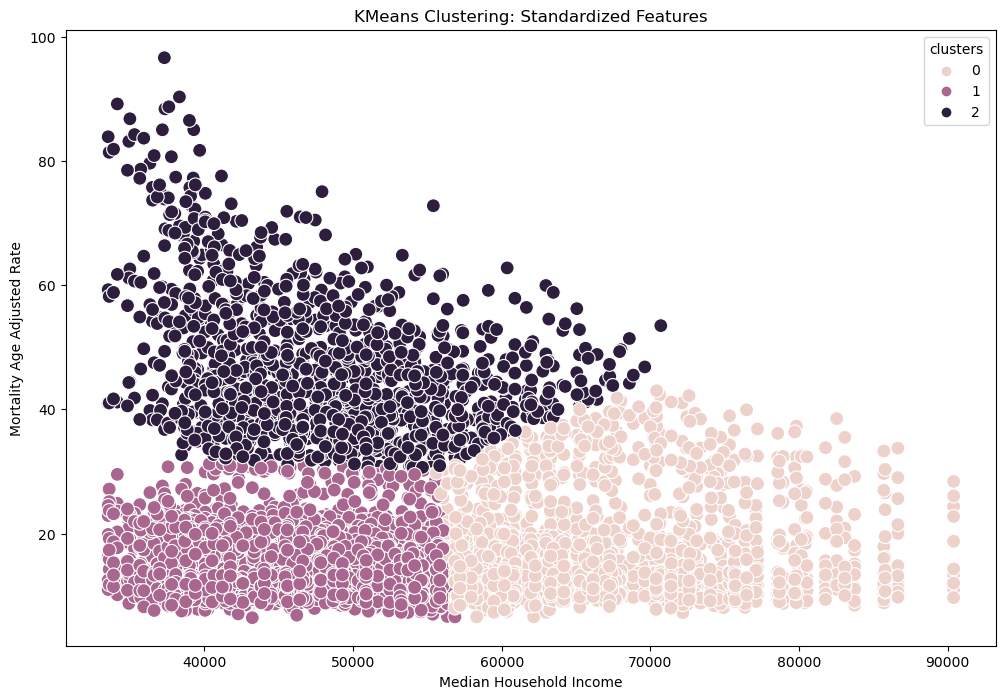

In [16]:
from sklearn.preprocessing import StandardScaler

# Create a new DataFrame with the selected features
ndf2 = df[['Mortality_Age_Adjusted_Rate', 'Median_Household_Income']].copy()

# Standardize the data
scaler = StandardScaler()
ndf_scaled = scaler.fit_transform(ndf2)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
ndf2['clusters'] = kmeans.fit_predict(ndf_scaled)

# Plot the clusters
plt.figure(figsize=(12,8))
sns.scatterplot(x=ndf2['Median_Household_Income'], y=ndf2['Mortality_Age_Adjusted_Rate'], hue=ndf2['clusters'], s=100,)
plt.xlabel('Median Household Income')
plt.ylabel('Mortality Age Adjusted Rate')
plt.title('KMeans Clustering: Standardized Features')
plt.show()

### The change in clustering results implies that the original scale difference between Median_Household_Income and Mortality_Age_Adjusted_Rate was influencing the clustering outcome. After standardization, the clusters reflect the patterns in the data more equitably across both features.

### Cluster 2: High mortality rate with a wide range of household incomes.
#### This cluster likely includes regions or groups where high mortality rates are observed regardless of income levels. Factors other than income might be driving the mortality rate in these cases.

### Cluster 0 & 1: Similar mortality rates but different household incomes.
#### These clusters suggest that there are groups with similar mortality rates but differing income levels. This might indicate that in some regions or groups, income has a significant impact on mortality, while in others, it does not.

In [17]:
ndf.loc[ndf['clusters'] == 2, 'cluster'] = 'black'
ndf.loc[ndf['clusters'] == 1, 'cluster'] = 'purple'
ndf.loc[ndf['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Poory\AppData\Local\Temp\ipykernel_21044\2936740402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf.loc[ndf['clusters'] == 2, 'cluster'] = 'black'


In [18]:
cluster_stats = ndf.groupby('cluster').agg({'Mortality_Age_Adjusted_Rate': ['mean', 'median', 'std', 'min', 'max'],
                                            'Median_Household_Income': ['mean', 'median', 'std', 'min', 'max'],
                                            '%_Adult_smoking': ['mean', 'median', 'std', 'min', 'max'],
                                            '%_Physically_Inactive': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()

cluster_stats

cluster Mortality_Age_Adjusted_Rate                                  \
                                 mean  median        std   min    max   
0   black                   20.926889  15.815  12.526553  6.59  72.78   
1    pink                   24.282158  17.840  16.833447  6.46  96.61   
2  purple                   19.364573  15.050  10.337748  7.27  59.94   

  Median_Household_Income                                     %_Adult_smoking  \
                     mean   median          std    min    max            mean   
0            54512.362069  54235.0  3966.581800  48443  62418       17.814009   
1            42337.200000  42457.0  3576.217002  33533  48219       20.912696   
2            70927.191919  70211.0  6448.582542  62765  90395       15.381111   

                                  %_Physically_Inactive                    \
   median       std    min    max                  mean  median       std   
0  17.435  3.045968   9.83  28.75             23.476379  23.440  3.216523   
1  20.825  2.992306  15.10  29.62             28.112957  28.195  4.126049   
2  15.180  2.297513   8.88  22.55             21.310202  21.340  2.816364   

                 
     min    max  
0  16.18  30.40  
1  17.53  35.68  
2  14.80  27.70

### "It is evident that the cluster with the color black has a higher mean and median mortality rate compared to the other two clusters. It is interesting to note that the mean and median values in this cluster are higher for the percentage of adults who smoke and the percentage of people who report having an inactive day.

### " For the household income column, although the results are convincing, we should note that our variables are not standardized.

In [19]:
ndf2.loc[ndf2['clusters'] == 2, 'cluster'] = 'black'
ndf2.loc[ndf2['clusters'] == 1, 'cluster'] = 'purple'
ndf2.loc[ndf2['clusters'] == 0, 'cluster'] = 'pink'

cluster_stats2 = ndf2.groupby('cluster').agg({'Mortality_Age_Adjusted_Rate': ['mean', 'median', 'std', 'min', 'max'],
                                            'Median_Household_Income': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()

cluster_stats2

cluster Mortality_Age_Adjusted_Rate                                   \
                                 mean  median        std    min    max   
0   black                   46.614827  44.050  11.220501  30.60  96.61   
1    pink                   17.257397  14.205   7.897453   6.59  43.00   
2  purple                   15.298431  14.010   4.827090   6.46  31.23   

  Median_Household_Income                                      
                     mean   median          std    min    max  
0            48204.605263  47776.0  7549.547294  33533  70702  
1            66327.664579  64209.0  7774.100971  55602  90395  
2            46383.306346  46541.0  5755.945843  33533  56855

### "When we standardize the data for these two variables, the results are different. We can see that clusters black and purple have a pretty similar household income mean, which is less than the pink cluster. However, the mortality rate in the black cluster is significantly higher than in the other two clusters. This suggests that factors other than income might be driving the mortality rate in these cases."

C:\Users\Poory\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Poory\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Poory\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


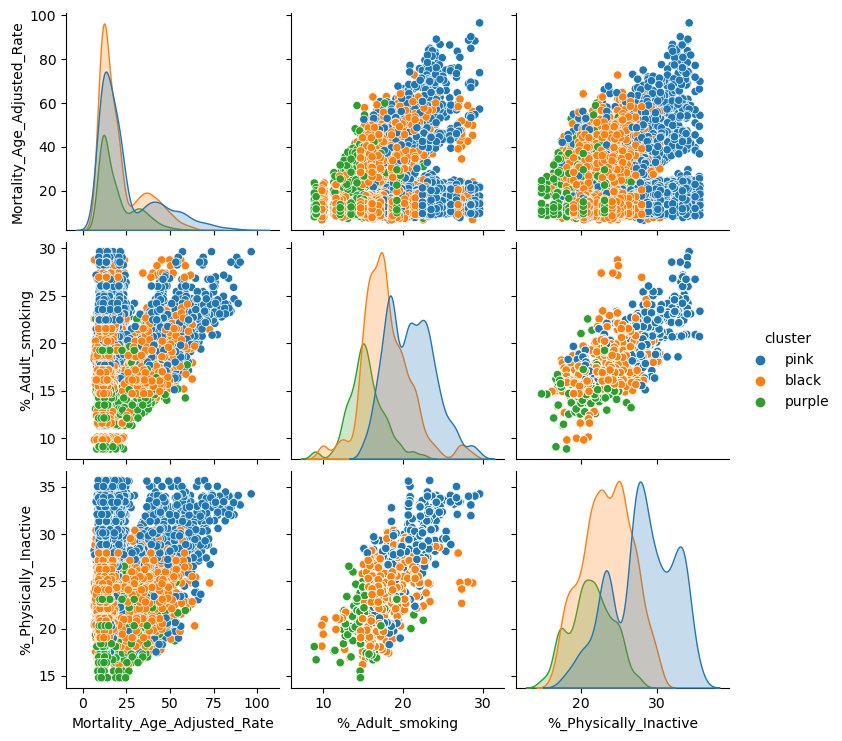

In [20]:
# Pair plot to visualize other features in the context of clusters
sns.pairplot(ndf, hue='cluster', vars=['Mortality_Age_Adjusted_Rate', '%_Adult_smoking', '%_Physically_Inactive'])
plt.show()

## Now I want to choose a subset of the main data frame for one cancer and do all these processes again


In [21]:
# Make a subset data for Lung and Bronchus cancer
l_df = df.loc[df['Leading_Cancer_Sites'] == 'Lung and Bronchus']

# Make a new data frame of related columns without categorical data:

ldf = l_df[['Mortality_Age_Adjusted_Rate','%_Fair_or_Poor_Health','%_Adult_smoking','%_Adults_with_Obesity','%_Physically_Inactive','%_Uninsured',
                   'Primary_Care_Physicians_Rate','Mental_Health_Provider_Rate','%_Unemployed','%_Children_in_Poverty',
                   '%_Adults_with_Diabetes','Median_Household_Income']]
ldf.head()

Mortality_Age_Adjusted_Rate  %_Fair_or_Poor_Health  %_Adult_smoking  \
1123                        59.72                  22.66            23.37   
1126                        56.86                  22.66            22.76   
1129                        54.18                  22.53            22.09   
1132                        54.78                  23.28            22.43   
1135                        52.68                  23.28            22.43   

      %_Adults_with_Obesity  %_Physically_Inactive  %_Uninsured  \
1123                  33.62                  32.80        17.64   
1126                  35.13                  33.18        17.14   
1129                  35.09                  33.14        17.55   
1132                  35.08                  33.55        17.42   
1135                  35.29                  31.79        16.49   

      Primary_Care_Physicians_Rate  Mental_Health_Provider_Rate  %_Unemployed  \
1123                         49.16                        19.80         12.07   
1126                         49.16                         7.16         11.20   
1129                         42.61                        10.91         10.46   
1132                         42.93                        35.21          8.57   
1135                         42.86                        43.65          7.67   

      %_Children_in_Poverty  %_Adults_with_Diabetes  Median_Household_Income  
1123                  26.43                   13.06                    37179  
1126                  31.99                   13.90                    36340  
1129                  31.75                   13.88                    36508  
1132                  32.15                   14.08                    37055  
1135                  32.55                   14.48                    38019

In [22]:
# The elbow technique

num_cl = range(1, 10) # Defines the range of potential clusters in the data.

kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(ldf).score(ldf) for i in range(len(kmeans))] 

score

C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[-207056396663.7485,
 -68750050792.51732,
 -32125676298.008312,
 -18698523108.73413,
 -12465242833.37292,
 -9231767967.519918,
 -6619285324.331011,
 -5105020661.557523,
 -4016917783.2133923]

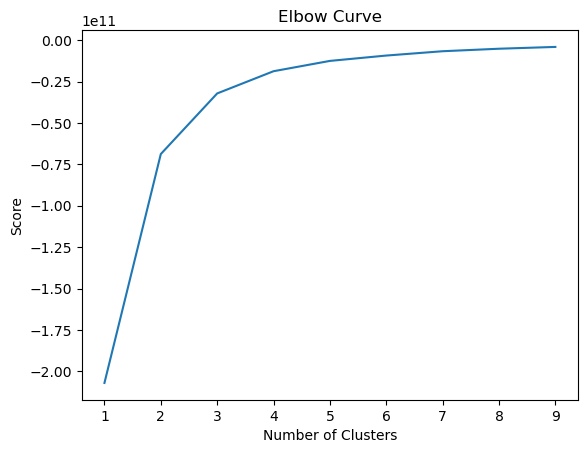

In [23]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

###  In this example, there is a significant transition from two to three on the x-axis. However, after that point, the curve levels out. This suggests that the optimal number of clusters for our data is three. It's worth noting that our data frame contains statistics for three groups in the gender column('Male', 'Female', 'Male & Female'). It's interesting that the elbow plot indicates that 3 clusters would be a better choice in this case.

In [24]:
# k-means clustering
kmeans = KMeans(n_clusters = 3) 

# Fit the k-means object to the data.
kmeans.fit(ldf)

ldf['clusters'] = kmeans.fit_predict(ldf)

ldf['clusters'].value_counts()

C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

clusters
2    696
1    690
0    297
Name: count, dtype: int64

In [25]:
ldf.head()

Mortality_Age_Adjusted_Rate  %_Fair_or_Poor_Health  %_Adult_smoking  \
1123                        59.72                  22.66            23.37   
1126                        56.86                  22.66            22.76   
1129                        54.18                  22.53            22.09   
1132                        54.78                  23.28            22.43   
1135                        52.68                  23.28            22.43   

      %_Adults_with_Obesity  %_Physically_Inactive  %_Uninsured  \
1123                  33.62                  32.80        17.64   
1126                  35.13                  33.18        17.14   
1129                  35.09                  33.14        17.55   
1132                  35.08                  33.55        17.42   
1135                  35.29                  31.79        16.49   

      Primary_Care_Physicians_Rate  Mental_Health_Provider_Rate  %_Unemployed  \
1123                         49.16                        19.80         12.07   
1126                         49.16                         7.16         11.20   
1129                         42.61                        10.91         10.46   
1132                         42.93                        35.21          8.57   
1135                         42.86                        43.65          7.67   

      %_Children_in_Poverty  %_Adults_with_Diabetes  Median_Household_Income  \
1123                  26.43                   13.06                    37179   
1126                  31.99                   13.90                    36340   
1129                  31.75                   13.88                    36508   
1132                  32.15                   14.08                    37055   
1135                  32.55                   14.48                    38019   

      clusters  
1123         1  
1126         1  
1129         1  
1132         1  
1135         1

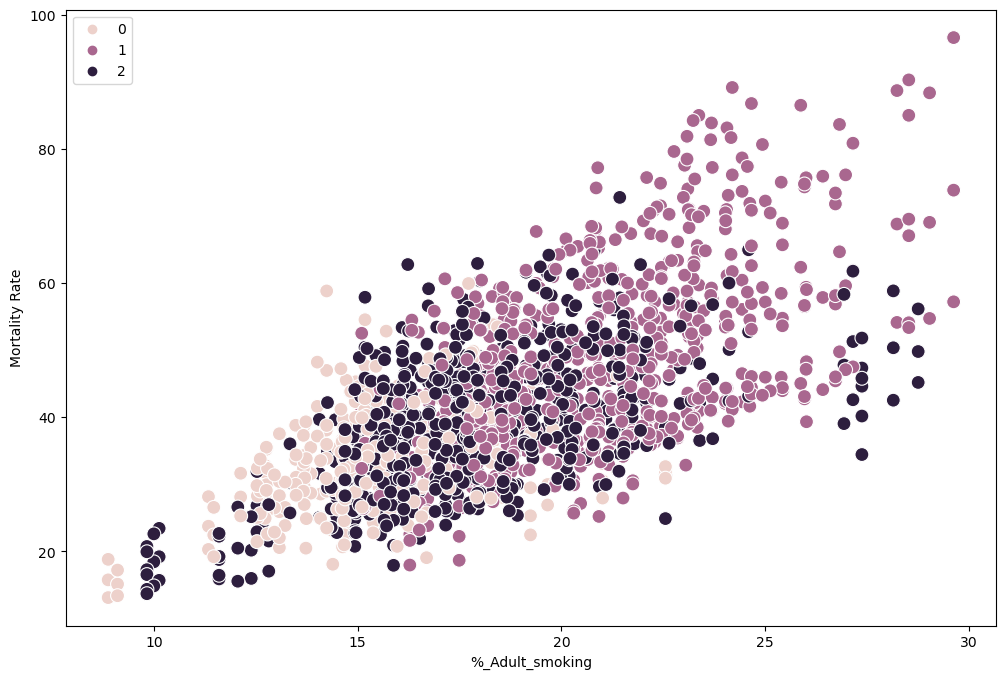

In [26]:
# Plot the clusters for the "Mortality_Age_Adjusted_Rate" and "%_Adult_smoking" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ldf['%_Adult_smoking'], y=ldf['Mortality_Age_Adjusted_Rate'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('%_Adult_smoking') 
plt.ylabel('Mortality Rate') 
plt.show()

### Here we can see the kmeans model divided data points into three almost distinct groups. the purple cluster has a higher percentage of adult smokers and a high mortality rate, on the other hand, the black cluster includes data points with a low percentage of adult smokers and a lower lung cancer mortality rate. in addition, the pink cluster is distributed in the whole plot and overlaps with two other clusters. 

### Correlation Between Smoking and Mortality: 
#### The plot supports the well-known public health insight that higher smoking rates are associated with higher lung cancer mortality rates.

### Role of Additional Factors: 
#### The presence of the pink cluster, which overlaps with the other two clusters, suggests that additional factors beyond smoking may influence lung cancer mortality rates.

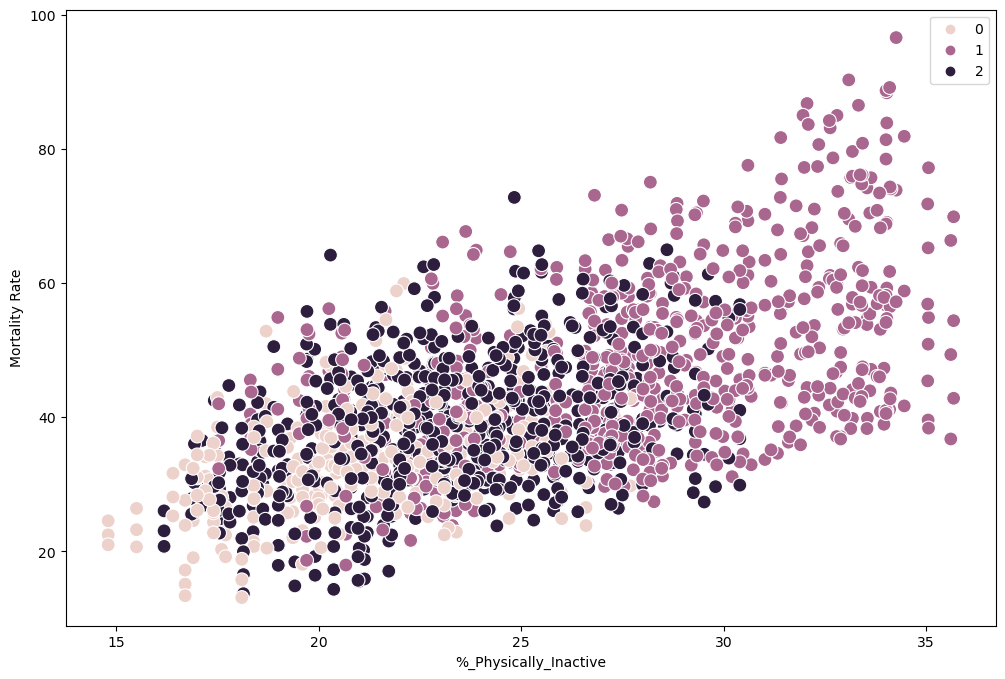

In [27]:
# Plot the clusters for the "Mortality_Age_Adjusted_Rate" and "%_Physically_Inactive" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ldf['%_Physically_Inactive'], y=ldf['Mortality_Age_Adjusted_Rate'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('%_Physically_Inactive') 
plt.ylabel('Mortality Rate') 
plt.show()

### The comparison between the percentage of people who are physically inactive and the lung and bronchus cancer mortality rate revealing a positive correlation, along with the k-means clustering results, provides several important insights.

### The positive correlation indicates that regions or groups with a higher percentage of physically inactive people tend to have higher lung and bronchus cancer mortality rates. This suggests that physical inactivity may be a contributing factor to higher mortality rates.

### Despite the overlap, the overall pattern of the clusters remains similar to the previous plot with smoking. This suggests that both physical inactivity and smoking are significant factors influencing lung and bronchus cancer mortality rates.

### The increased overlap between clusters in the physical inactivity plot could indicate that physical inactivity is a more pervasive issue across different groups, not as sharply delineated as smoking habits.
### This might also suggest that physical inactivity interacts with a wider range of other factors, making its impact less distinct when viewed in isolation.


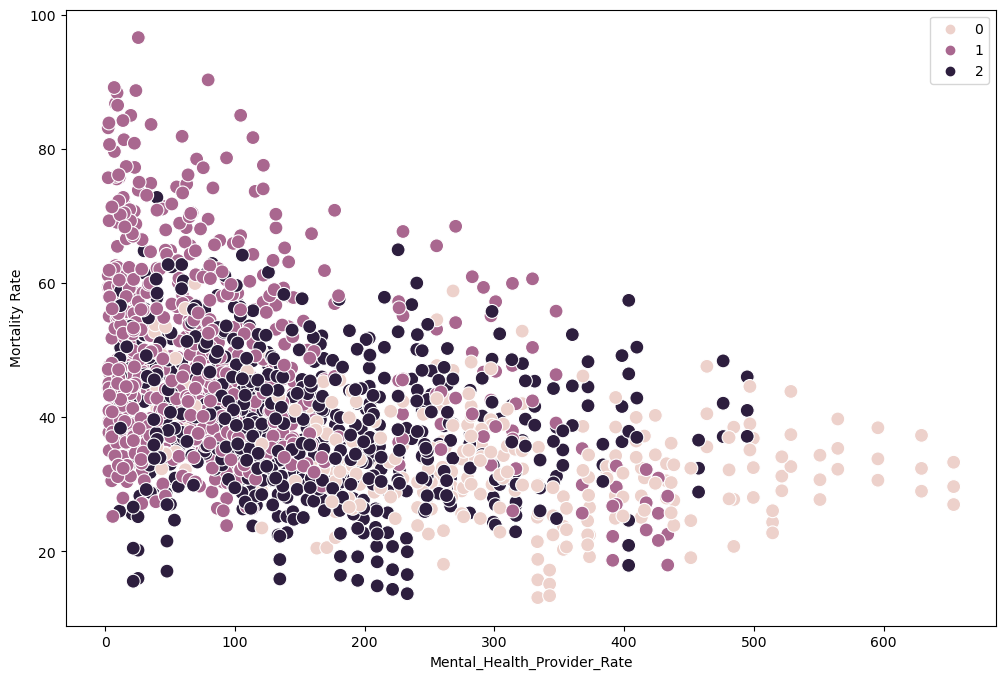

In [28]:
# Plot the clusters for the "Mortality_Age_Adjusted_Rate" and "Mental_Health_Provider_Rate" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=ldf['Mental_Health_Provider_Rate'], y=ldf['Mortality_Age_Adjusted_Rate'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Mental_Health_Provider_Rate') 
plt.ylabel('Mortality Rate') 
plt.show()

### Negative Correlation:
#### At first glance, the scatter plot suggests a negative correlation between mental health provider rate and lung and bronchus cancer mortality rate. This implies that areas with a higher rate of mental health providers tend to have lower lung cancer mortality rates.

### Cluster Characteristics:
#### Pink Cluster:
##### This cluster has the highest mortality rates and the lowest mental health provider rates.
##### This suggests that a lack of mental health providers might be associated with higher cancer mortality, potentially due to lower overall health ##### support and preventive care.
#### Purple and Black Clusters:
##### Both of these clusters have lower mortality rates compared to the pink cluster.
##### They overlap significantly in terms of mortality rates but differ in mental health provider rates, with the black cluster having a higher rate of mental health providers compared to the purple cluster.

### Impact of Mental Health Providers:
#### The presence of mental health providers seems to be associated with better health outcomes, as indicated by the lower mortality rates in regions with more providers. Mental health care can contribute to overall well-being, reduce stress, and improve health behaviors, which can indirectly affect cancer outcomes.

C:\Users\Poory\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Poory\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Poory\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Poory\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

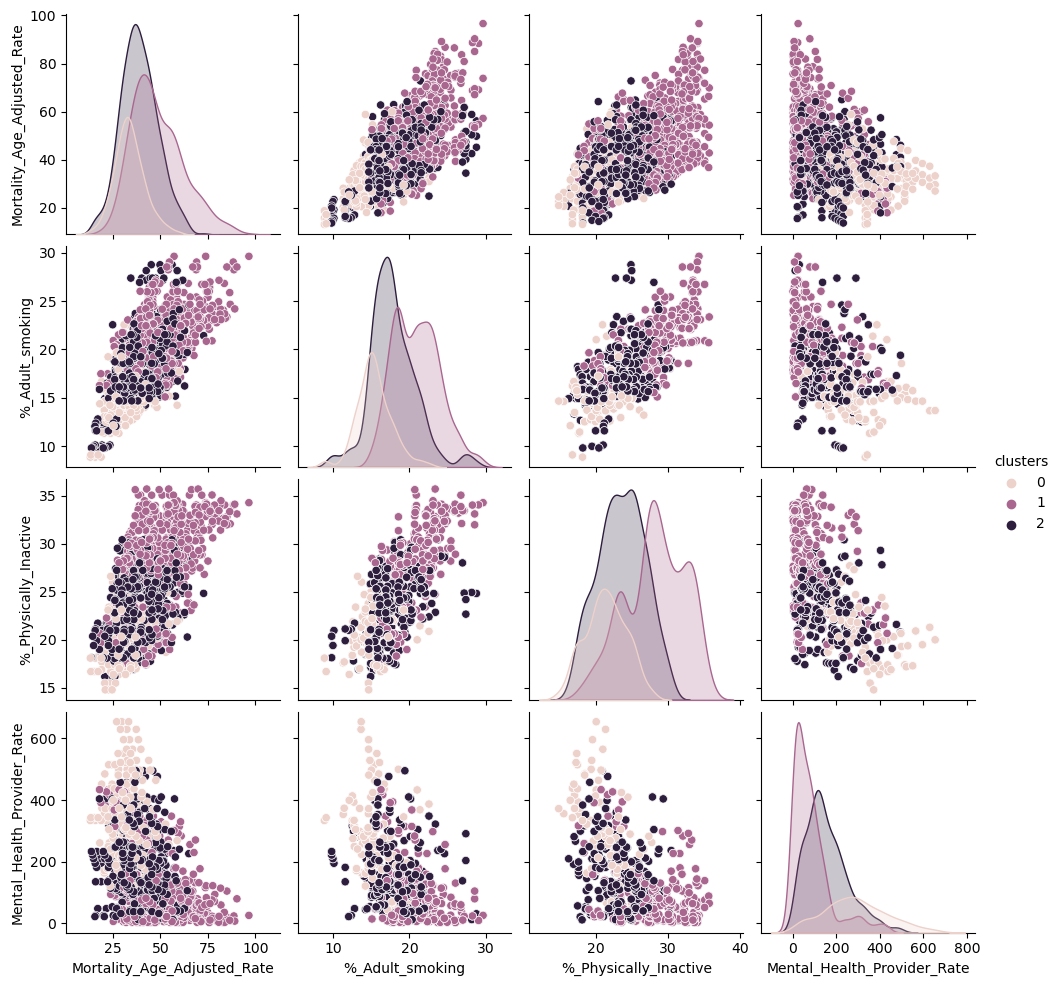

In [29]:
# Pair plot to visualize other features in the context of clusters
sns.pairplot(ldf, hue='clusters', vars=['Mortality_Age_Adjusted_Rate', '%_Adult_smoking', '%_Physically_Inactive', 'Mental_Health_Provider_Rate'])
plt.show()

C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Poory\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


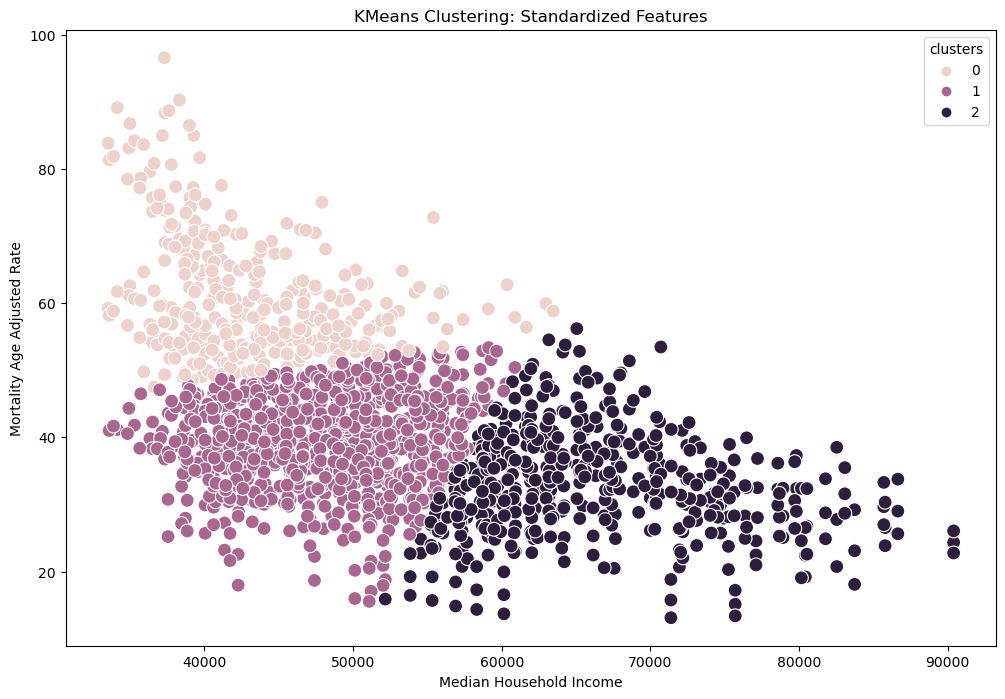

In [30]:
from sklearn.preprocessing import StandardScaler

# Create a new DataFrame with the selected features
ldf2 = ldf[['Mortality_Age_Adjusted_Rate', 'Median_Household_Income']].copy()

# Standardize the data
scaler = StandardScaler()
ndf_scaled = scaler.fit_transform(ldf2)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
ldf2['clusters'] = kmeans.fit_predict(ndf_scaled)

# Plot the clusters
plt.figure(figsize=(12,8))
sns.scatterplot(x=ldf2['Median_Household_Income'], y=ldf2['Mortality_Age_Adjusted_Rate'], hue=ldf2['clusters'], s=100,)
plt.xlabel('Median Household Income')
plt.ylabel('Mortality Age Adjusted Rate')
plt.title('KMeans Clustering: Standardized Features')
plt.show()

## The scatter plot shows a clear negative correlation between median household income and the mortality rate of lung and bronchus cancer. This means that as household income increases, the mortality rate tends to decrease.

In [31]:
ldf2.loc[ldf2['clusters'] == 2, 'cluster'] = 'black'
ldf2.loc[ldf2['clusters'] == 1, 'cluster'] = 'purple'
ldf2.loc[ldf2['clusters'] == 0, 'cluster'] = 'pink'

cluster_stats2 = ldf2.groupby('cluster').agg({'Mortality_Age_Adjusted_Rate': ['mean', 'median', 'std', 'min', 'max'],
                                            'Median_Household_Income': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()

cluster_stats2

cluster Mortality_Age_Adjusted_Rate                                 \
                                 mean median       std    min    max   
0   black                   32.832657  32.42  7.601090  13.11  56.21   
1    pink                   61.071173  58.39  9.149752  47.51  96.61   
2  purple                   39.324499  39.56  6.820122  15.55  53.38   

  Median_Household_Income                                      
                     mean   median          std    min    max  
0            66199.141988  64209.0  7803.196968  52168  90395  
1            43039.325513  41808.0  5652.670791  33533  63471  
2            48181.461720  48743.0  5678.488769  33533  60888

## Black Cluster:
### This cluster represents regions with higher median household incomes (mean: $66,199.14) and the lowest mortality rates (mean: 32.83).
### The lower mortality rates in this cluster suggest better access to healthcare, healthier lifestyles, and possibly better overall living conditions associated with higher income.

## Pink Cluster:
### This cluster represents regions with the lowest median household incomes (mean: $43,039.33) and the highest mortality rates (mean: 61.07).
### The higher mortality rates in this cluster indicate poorer health outcomes, likely due to limited access to healthcare, higher levels of stress, and possibly higher prevalence of risk factors such as smoking and poor diet.

## Purple Cluster:
### This cluster has median household incomes (mean: $48,181.46) that are higher than the pink cluster but lower than the black cluster.
### The mortality rates (mean: 39.32) are lower than the pink cluster but higher than the black cluster.
### This suggests an intermediate level of access to healthcare and living conditions, reflecting an improvement in health outcomes with increased income but still lagging behind the highest income group.

In [32]:
ldf.loc[ldf['clusters'] == 2, 'cluster'] = 'black'
ldf.loc[ldf['clusters'] == 1, 'cluster'] = 'purple'
ldf.loc[ldf['clusters'] == 0, 'cluster'] = 'pink'

cluster_stats = ldf.groupby('cluster').agg({'Mortality_Age_Adjusted_Rate': ['mean', 'median', 'std', 'min', 'max'],
                                            '%_Adult_smoking': ['mean', 'median', 'std', 'min', 'max'],
                                            '%_Physically_Inactive': ['mean', 'median', 'std', 'min', 'max'],
                                            'Mental_Health_Provider_Rate': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()

cluster_stats


C:\Users\Poory\AppData\Local\Temp\ipykernel_21044\3610847781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ldf.loc[ldf['clusters'] == 2, 'cluster'] = 'black'


cluster Mortality_Age_Adjusted_Rate                                   \
                                 mean  median        std    min    max   
0   black                   38.772701  38.280   9.677674  13.69  72.78   
1    pink                   33.736633  33.290   7.976800  13.11  59.94   
2  purple                   48.395203  45.995  13.640247  17.96  96.61   

  %_Adult_smoking                                 %_Physically_Inactive  \
             mean  median       std    min    max                  mean   
0       17.814009  17.435  3.047561   9.83  28.75             23.476379   
1       15.381111  15.180  2.300334   8.88  22.55             21.310202   
2       20.912696  20.825  2.993885  15.10  29.62             28.112957   

                                  Mental_Health_Provider_Rate           \
   median       std    min    max                        mean   median   
0  23.440  3.218205  16.18  30.40                  156.142198  134.670   
1  21.340  2.819822  14.80  27.70                  288.480909  279.400   
2  28.195  4.128226  17.53  35.68                   85.101957   62.695   

                              
          std    min     max  
0   97.351875  11.12  494.94  
1  142.990254  38.26  654.04  
2   89.142332   2.37  433.67

### Black Cluster:
#### The black cluster has the lowest mean mortality rate at 33.74.
#### This cluster also has the lowest mean percentages of adult smoking (15.38) and physical inactivity (21.31).
#### The mean mental health provider rate is the highest among the three clusters at 288.48, indicating better access to mental health services.

### Pink Cluster:
#### The pink cluster has a higher mean mortality rate (38.77) compared to the black cluster but lower than the purple cluster.
#### The mean percentages for adult smoking (17.81) and physical inactivity (23.48) are higher than the black cluster but lower than the purple cluster.
#### The mental health provider rate is lower than the black cluster at 156.14, indicating relatively moderate access to mental health services.

### Purple Cluster:
#### The purple cluster has the highest mean mortality rate at 48.40.
#### This cluster has the highest mean percentages for adult smoking (20.91) and physical inactivity (28.11).
#### The mental health provider rate is the lowest among the three clusters at 85.10, indicating the least access to mental health services.

## Conclusions
### Impact of Lifestyle Factors: 
#### There is a clear pattern where clusters with higher percentages of adult smoking and physical inactivity have higher mortality rates. This suggests that lifestyle factors play a significant role in lung and bronchus cancer mortality.

### Access to Mental Health Services: 
#### There seems to be an inverse relationship between the mental health provider rate and the mortality rate. Clusters with better access to mental health services (higher mental health provider rates) have lower mortality rates.

### Socioeconomic and Health Inequities: 
#### The clusters highlight disparities in health outcomes, lifestyle factors, and access to healthcare services. The black cluster, with higher mental health provider rates and lower percentages of smoking and physical inactivity, has better health outcomes. The purple cluster, with the lowest mental health provider rates and higher unhealthy lifestyle percentages, has the worst health outcomes